In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, scale
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
train = pd.read_csv("output/train_cleaned.csv", sep=";", index_col="ID")
def cleanDataset(df):
    # Convert Dates
    df.order_date = pd.to_datetime(df.order_date, format='%Y-%m-%d')
    df.account_creation_date = pd.to_datetime(df.account_creation_date, format='%Y-%m-%d')
    df.deliverydate_estimated = pd.to_datetime(df.deliverydate_estimated, format='%Y-%m-%d')
    df.deliverydate_actual = pd.to_datetime(df.deliverydate_actual, format='%Y-%m-%d')
    # Convert Categories
    df.form_of_address = df.form_of_address.astype('category')
    df.email_domain = df.email_domain.astype('category')
    df.payment = df.payment.astype('category')
    df.advertising_code = df.advertising_code.astype('category')
    df.x_advertising_code_bin = df.x_advertising_code_bin.astype('category')
    df.x_order_date_yearweek = df.x_order_date_yearweek.astype('category')
    LE = {}
    for col in train.columns:
        if df[col].dtype.name == "category":
            LE[col] = LabelEncoder()
            train[col] = LE[col].fit_transform(df[col])
    return(df, LE)
train, LE_train = cleanDataset(train)


In [13]:
from sklearn.externals import joblib
test = joblib.load('output/clf_rf_cv.results.pkl')
pd.DataFrame(list(test['params']))

,min_samples_leaf,min_samples_split,n_estimators,n_jobs
0,15,2,100,3
1,15,4,250,3
2,3,2,500,3
3,1,8,250,3
4,15,2,250,3
5,3,8,500,3
6,3,2,100,3
7,1,8,500,3
8,9,8,100,3
9,1,2,500,3


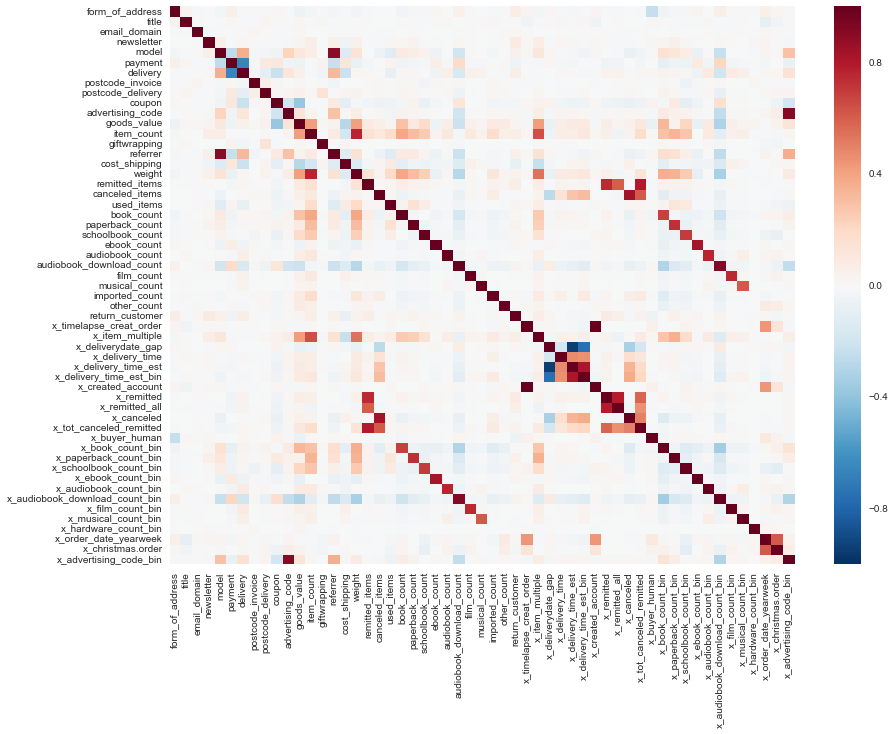

In [16]:
plt.figure(figsize=(14, 10))
sns.heatmap(train.fillna(-99999).corr())